# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\LR Real Example\\1.04.Real-life example.csv' )
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

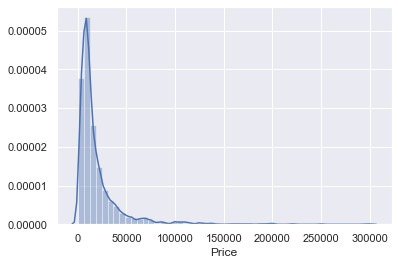

In [8]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


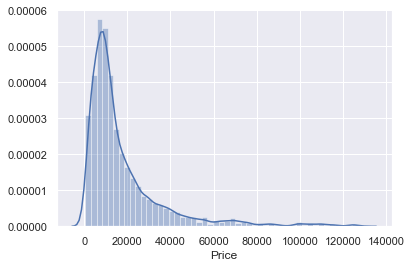

In [10]:
sns.distplot(data_1['Price'])

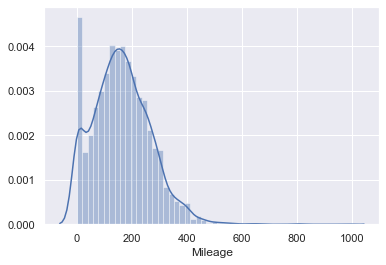

In [11]:
sns.distplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

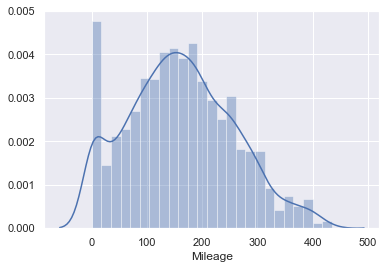

In [13]:
sns.distplot(data_2['Mileage'])

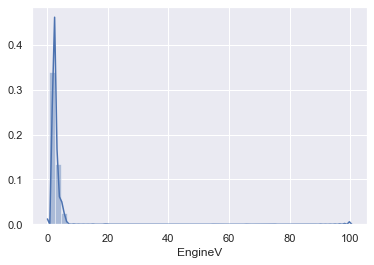

In [14]:
sns.distplot(data_no_mv['EngineV'])

In [15]:
data_3 = data_2[data_2['EngineV']<6.5]

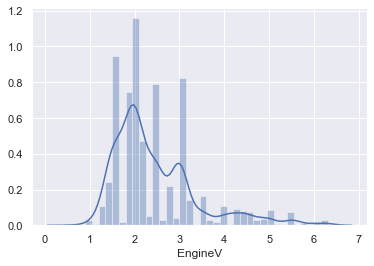

In [16]:
sns.distplot(data_3['EngineV'])

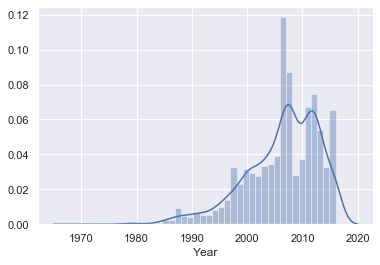

In [17]:
sns.distplot(data_no_mv['Year'])

In [18]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

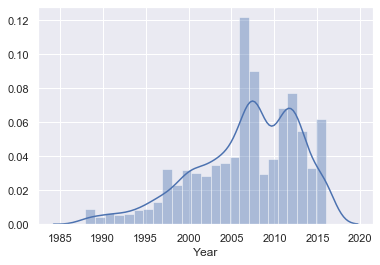

In [19]:
sns.distplot(data_4['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [22]:
data_cleaned.skew()

Price      2.635076
Mileage    0.272692
EngineV    1.479109
Year      -0.718794
dtype: float64

In [23]:
## OLS Assumptions, 2nd Video

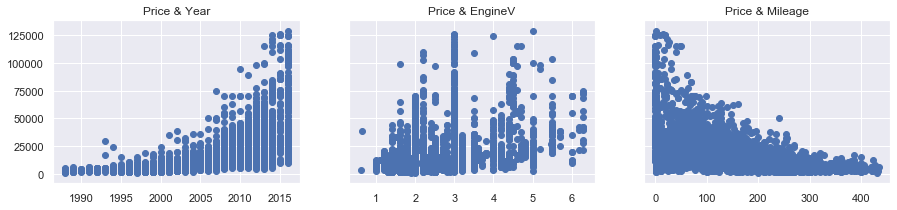

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize =(15,3) ) #Use when studying other plots
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price & Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price & EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price & Mileage')
plt.show()

In [25]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


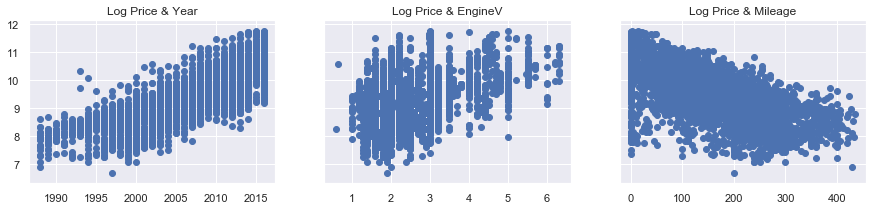

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize =(15,3) ) #Use when studying other plots
ax1.scatter(data_cleaned['Year'], data_cleaned['Log Price'])
ax1.set_title('Log Price & Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log Price'])
ax2.set_title('Log Price & EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log Price'])
ax3.set_title('Log Price & Mileage')
plt.show()

In [27]:
data_final=data_cleaned.drop(['Price'], axis =1)

In [28]:
data_final.skew()

Mileage      0.272692
EngineV      1.479109
Year        -0.718794
Log Price    0.125705
dtype: float64

In [40]:
from scipy.stats.stats import pearsonr, spearmanr
pearsonr(data_final['Year'], data_final['Log Price'])

(0.7469068490335835, 0.0)

In [30]:
data_final.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =data_final[['Year', 'Mileage', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']= variables.columns

In [32]:
vif

,VIF,features
0,10.354854,Year
1,3.791584,Mileage
2,7.662068,EngineV


In [33]:
data_final.skew()

Mileage      0.272692
EngineV      1.479109
Year        -0.718794
Log Price    0.125705
dtype: float64

In [34]:
from scipy.stats.stats import pearsonr, spearmanr
pearsonr(data_final['EngineV'], data_final['Mileage'])

(0.005709596629211534, 0.7226341251562252)

In [35]:
AADataMulticollinearity = data_final.drop(['Year'], axis =1)

In [36]:
AADataMulticollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [37]:
## Dummy Variables, 3rd Video

In [34]:
BBdata_with_dummies = pd.get_dummies(AADataMulticollinearity, drop_first =True)

In [35]:
BBdata_with_dummies.head()

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [36]:
BBdata_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
cols = ['Log Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [38]:
CCdata_preprocessed = BBdata_with_dummies[cols]
CCdata_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [39]:
##Linear Regression

In [40]:
targets = CCdata_preprocessed['Log Price']
inputs = CCdata_preprocessed.drop(['Log Price'], axis =1)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
inputs_scaled = scaler.transform(inputs)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state = 365)

In [44]:
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_hat= reg.predict(x_train)

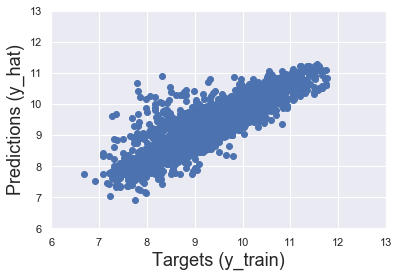

In [46]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size =18)
plt.ylabel('Predictions (y_hat)', size =18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


Text(0.5, 1.0, 'Residuals PDF')

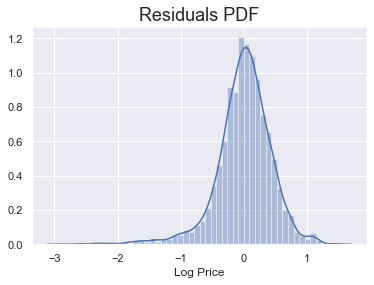

In [47]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size = 18)

In [48]:
reg.score(x_train, y_train)

0.744996578792662

In [49]:
reg.intercept_

9.415239458021299

In [50]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [51]:
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999


In [52]:
reg_summary= pd.DataFrame(inputs.columns.values, columns =['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [53]:
data_cleaned.skew()

Price        2.635076
Mileage      0.272692
EngineV      1.479109
Year        -0.718794
Log Price    0.125705
dtype: float64

In [54]:
###Testing

In [55]:
y_hat_test = reg.predict(x_test)

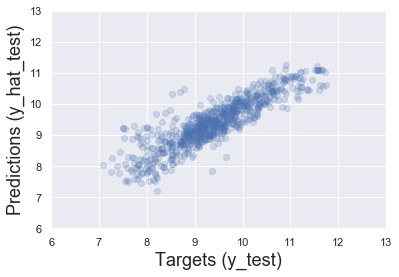

In [56]:
plt.scatter(y_test, y_hat_test, alpha =0.2)
plt.xlabel('Targets (y_test)', size =18)
plt.ylabel('Predictions (y_hat_test)', size =18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [57]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [59]:
df_pf['Target'] = np.exp(y_test)

In [60]:
y_test = y_test.reset_index(drop =True)
df_pf.head()

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


In [61]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [62]:
df_pf['Difference(%)'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference(%)
0,10685.501696,NaN,NaN,NaN
1,3499.255242,7900.0,4400.744758,55.705630
2,7553.285218,NaN,NaN,NaN
3,7463.963017,NaN,NaN,NaN
4,11353.490075,NaN,NaN,NaN
5,21289.799394,14200.0,-7089.799394,49.928165
6,20159.189144,NaN,NaN,NaN
7,20349.617702,NaN,NaN,NaN
8,11581.537864,11950.0,368.462136,3.083365
9,33614.617349,NaN,NaN,NaN


In [111]:
 df_pf.describe()

,Prediction,Target,Residual,Difference(%)
count,774.00,147.00,147.00,147.00
mean,15946.76,14463.84,-2245.72,160.03
std,13133.20,14242.31,20036.96,285.22
min,1320.56,1400.00,-62998.37,0.29
25%,7413.64,6600.00,-12990.59,36.78
50%,11568.17,10700.00,-1826.26,68.90
75%,20162.41,17825.00,6300.49,173.71
max,77403.06,109999.00,99435.61,2571.36


In [64]:
pd.options.display.max_rows == 999
pd.set_option('display.float_format', lambda x: '%.2f'% x)
df_pf.sort_values(by = ['Difference(%)'])

,Prediction,Target,Residual,Difference(%)
109,12663.54,12700.00,36.46,0.29
606,20680.40,20500.00,-180.40,0.88
433,6977.90,6900.00,-77.90,1.13
8,11581.54,11950.00,368.46,3.08
330,11336.71,10800.00,-536.71,4.97
440,8638.63,8200.00,-438.63,5.35
84,4364.08,4000.00,-364.08,9.10
31,12858.08,14500.00,1641.92,11.32
313,10014.71,11600.00,1585.29,13.67
122,19335.34,22700.00,3364.66,14.82


In [65]:
from pandas import Series, DataFrame
from numpy.random import randn
from matplotlib import rcParams

In [66]:
eedata = data_final

In [67]:
Price = np.exp(data_final['Log Price'])
eedata['Price'] = Price
print (type(eedata))
row_indexes = np.where(eedata["Brand"] == "Audi")[0]
BrandAudi = eedata.iloc[row_indexes, :]
BrandAudi

<class 'pandas.core.frame.DataFrame'>


,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price,Price
3,Audi,crossover,240,4.20,Petrol,yes,2007,10.04,23000.00
5,Audi,vagon,200,2.70,Diesel,yes,2006,9.56,14200.00
10,Audi,vagon,165,2.70,Gas,yes,2003,9.16,9500.00
16,Audi,vagon,250,2.50,Diesel,no,1998,8.16,3500.00
19,Audi,sedan,225,2.40,Gas,yes,1998,8.82,6800.00
21,Audi,sedan,163,4.20,Diesel,yes,2008,10.12,24900.00
23,Audi,sedan,330,2.40,Petrol,yes,1999,8.78,6500.00
26,Audi,sedan,1,2.30,Gas,yes,1989,7.97,2900.00
34,Audi,other,14,1.80,Petrol,yes,2014,10.43,33900.00
57,Audi,crossover,21,3.00,Petrol,yes,2015,11.16,69999.00


In [68]:
row_indexes = np.where(eedata["Brand"] == "BMW")[0]
BrandBMW = eedata.iloc[row_indexes, :]
BrandBMW
BrandBMW.loc[32:33,'Body']

32        sedan
33    crossover
Name: Body, dtype: object

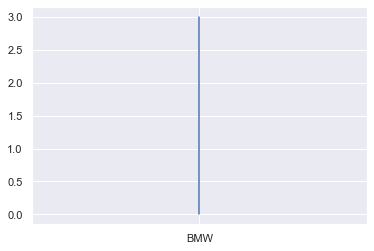

In [69]:
plt.plot(['BMW','BMW','BMW','BMW'], [0,1,2,3])

"""
plt.plot(eedata['BMW'], ['EngineV'])
plt.xlabel('BMW', size =18)
plt.ylabel('EngineV', size =18)
#plt.xlim(6,13)
#plt.ylim(6,13)
"""

plt.show()



In [71]:
capstone = pd.read_csv('C:\\Users\\Ufuk ALtan\\Downloads\\Downloads\\Data Science\\Capstone Data 2014.csv')
capstone

,Country,Technology,GDP,ID,ED
0,United States,99.50,17430.00,106,39
1,China,100.00,10480.00,127,38
2,Germany,93.90,3891.00,115,21
3,United Kingdom,76.70,3023.00,92,16
4,France,55.80,2852.00,84,35
5,Brazil,48.30,2456.00,28,29
6,Italy,50.60,2152.00,78,35
7,Russia,46.20,2064.00,20,35
8,Australia,56.50,1465.00,18,30
9,South Korea,80.40,1411.00,106,19


In [72]:
capstone.describe()

,Technology,GDP,ID,ED
count,35.00,35.00,35.00,35.00
mean,56.25,1721.90,49.26,33.66
std,19.97,3302.68,34.06,14.58
min,10.00,177.90,3.00,11.00
25%,46.35,322.10,20.50,25.50
50%,55.70,594.70,49.00,31.00
75%,66.00,1438.00,70.00,37.50
max,100.00,17430.00,127.00,79.00


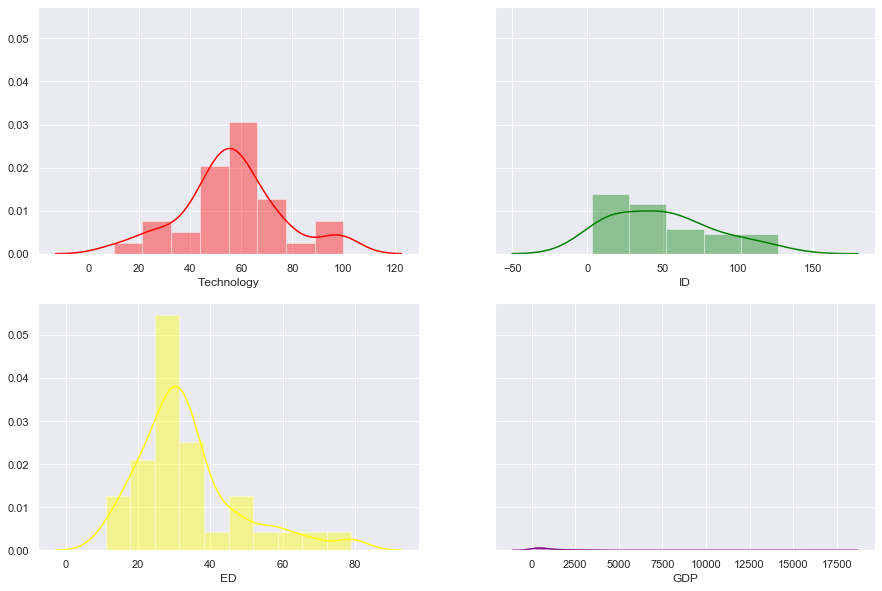

In [73]:
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
sns.distplot(capstone['Technology'], color = 'red', ax=axes[0, 0])
sns.distplot(capstone['ID'], color = 'green', ax=axes[0, 1])
sns.distplot(capstone['ED'], color = 'yellow',ax=axes[1, 0] )
sns.distplot(capstone['GDP'], color = 'purple',ax=axes[1, 1] )

([<matplotlib.patches.Wedge at 0x25c98db6710>,
 [Text(1.6908451968470581, 2.1687652063557348, 'United States'),
  Text(-1.9586957949866701, 1.9302877460890477, 'China'),
  Text(-2.7488471247770505, 0.0796208804582288, 'Germany'),
  Text(-2.600314182141606, -0.8949112549036544, 'United Kingdom'),
  Text(-2.20951463930004, -1.637237019713033, 'France'),
  Text(-1.6782107292532924, -2.178556574482089, 'Brazil'),
  Text(-1.1117395120941598, -2.5152604750300993, 'Italy'),
  Text(-0.5366513840526542, -2.697129083302164, 'Russia'),
  Text(-0.03422379239817947, -2.749787033941699, 'Australia'),
  Text(0.3768686559729109, -2.7240539671866215, 'South Korea'),
  Text(0.7674005300550548, -2.640756790480945, 'Spain'),
  Text(1.1290872805128647, -2.507521069300129, 'Mexico'),
  Text(1.4145388937456904, -2.3583001755672917, 'Turkey'),
  Text(1.6321593583497498, -2.2132681330899184, 'Indonesia'),
  Text(1.829181979999222, -2.053434509315095, 'Netherlands'),
  Text(1.9927862075156253, -1.89507338410297

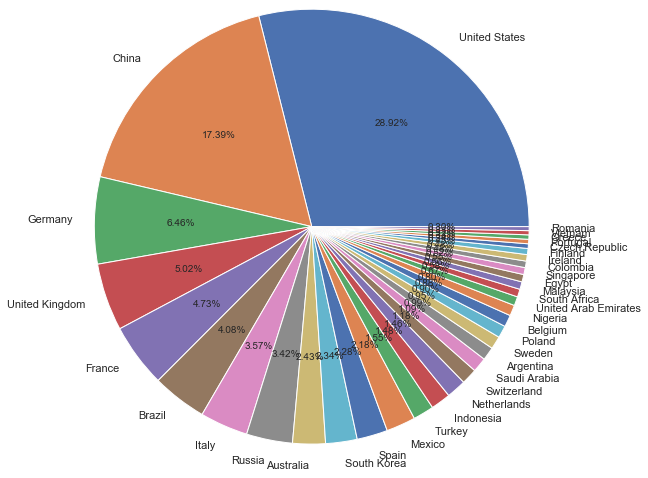

In [74]:
LB = capstone['Country']
plt.pie(capstone['GDP'], labels = LB, radius = 2.5, autopct = '%0.2f%%')

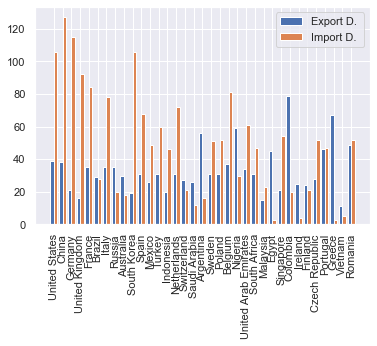

In [75]:
ypos = np.arange(len(capstone['Country']))
plt.xticks(ypos, capstone['Country'], rotation =90)
plt.bar(ypos-0.2, capstone['ED'], width = 0.4, label ='Export D. ')
plt.bar(ypos+0.2, capstone['ID'], width = 0.4, label ='Import D. ')
plt.legend()

In [76]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

In [77]:
pearsonr(capstone['ED'], capstone['Technology'])

(-0.6021323110769585, 0.00012978424328599343)

In [78]:
capstone.skew()

Technology   0.15
GDP          3.91
ID           0.54
ED           1.29
dtype: float64

In [79]:
pearsonr(capstone['ID'], capstone['Technology'])

(0.7349191702694823, 4.977177283798455e-07)

In [80]:
spearmanr(capstone['GDP'], capstone['ED'])

SpearmanrResult(correlation=-0.10801365094777304, pvalue=0.5368250631516475)

In [81]:
spearmanr(capstone['GDP'], capstone['Technology'])

SpearmanrResult(correlation=0.5126768505262319, pvalue=0.0016386433013948602)

In [82]:
capstone.median()

Technology    55.70
GDP          594.70
ID            49.00
ED            31.00
dtype: float64

In [83]:
capstone.mean()

Technology     56.25
GDP          1721.90
ID             49.26
ED             33.66
dtype: float64

Text(0, 0.5, 'Technology')

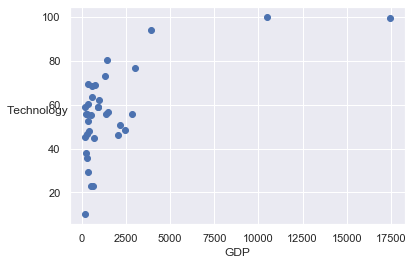

In [84]:
plt.scatter(capstone['GDP'], capstone['Technology'])
plt.xlabel('GDP')
plt.ylabel(('Technology'), rotation = 0)

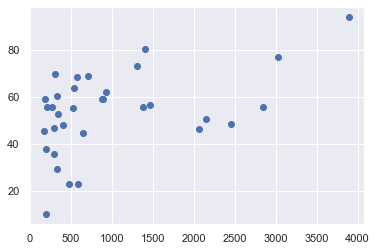

In [85]:
thesis = capstone[capstone['GDP']<5000]
plt.scatter(thesis['GDP'], thesis['Technology'])

SpearmanrResult(correlation=0.4188534238682315, pvalue=0.015262719380636343)

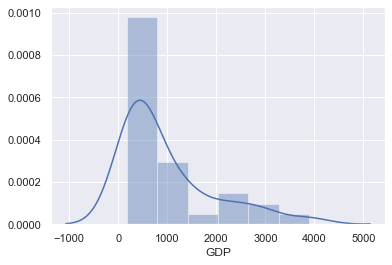

In [86]:
sns.distplot(thesis['GDP'])
thesis.skew()
spearmanr(thesis['GDP'], thesis['Technology'])

In [87]:
spearmanr(capstone['GDP'], capstone['Technology'])

SpearmanrResult(correlation=0.5126768505262319, pvalue=0.0016386433013948602)

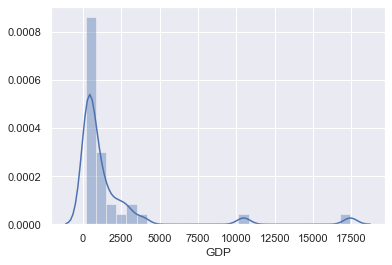

In [88]:
sns.distplot(capstone['GDP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25c99b2af28>,
 'caps': [<matplotlib.lines.Line2D at 0x25c99b369b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c99b2ada0>],
 'medians': [<matplotlib.lines.Line2D at 0x25c99b36e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c99b41470>],
 'means': []}

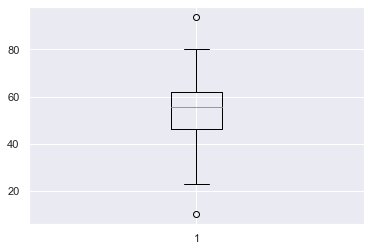

In [89]:
plt.boxplot(thesis['Technology'] )

In [90]:
from sklearn.cluster import KMeans

In [91]:
cluster_data = thesis[['GDP', 'Technology']]
x = cluster_data.copy()
cluster_data

,GDP,Technology
2,3891.00,93.90
3,3023.00,76.70
4,2852.00,55.80
5,2456.00,48.30
6,2152.00,50.60
7,2064.00,46.20
8,1465.00,56.50
9,1411.00,80.40
10,1377.00,55.50
11,1314.00,72.90


In [92]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Technology')

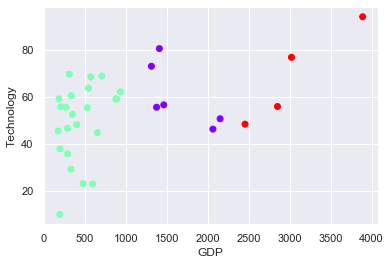

In [94]:
plt.scatter(clusters['GDP'], clusters['Technology'], c =clusters['cluster_pred'], cmap ='rainbow')
plt.xlabel('GDP')
plt.ylabel('Technology')

In [98]:
capita = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\2018 GDP per capita.csv')
capita.head(80)

,Country,GDP pc,Absolute
0,Luxembourg,113954.40,8091.20
1,Switzerland,83583.00,2945.60
2,Norway,82372.40,6982.90
3,Macao SAR,81585.40,4474.40
4,Iceland,75699.60,5451.30
5,Ireland,75192.30,6481.50
6,Qatar,67818.30,6793.60
7,United States,62517.50,2725.50
8,Singapore,61230.20,3516.80
9,Denmark,61227.00,4596.40


([<matplotlib.patches.Wedge at 0x25c9ae1cc18>,
 [Text(2.7283945964555443, 0.3440391344486659, 'Luxembourg'),
  Text(2.5899321524594243, 0.9245276878800832, 'Switzerland'),
  Text(2.378891062641965, 1.3796294111398841, 'Norway'),
  Text(2.0926163256762793, 1.7842244571558559, 'Macao SAR'),
  Text(1.7539719202236812, 2.118037417768358, 'Iceland'),
  Text(1.379659966503772, 2.3788733419051153, 'Ireland'),
  Text(0.9896706629152633, 2.565745891347166, 'Qatar'),
  Text(0.612668871268587, 2.6808835957904766, 'United States'),
  Text(0.24294912424106996, 2.7392472913248445, 'Singapore'),
  Text(-0.12736932308553767, 2.747048790163133, 'Denmark'),
  Text(-0.48187659686364587, 2.707451743871922, 'Australia'),
  Text(-0.8070052793195757, 2.62892420566861, 'Sweden'),
  Text(-1.1097723713550258, 2.5161290276488293, 'Netherlands'),
  Text(-1.3915860113716223, 2.371916603288324, 'Austria'),
  Text(-1.6500526246627119, 2.1999605305195127, 'San Marino'),
  Text(-1.8838792116933947, 2.003371936448515, 

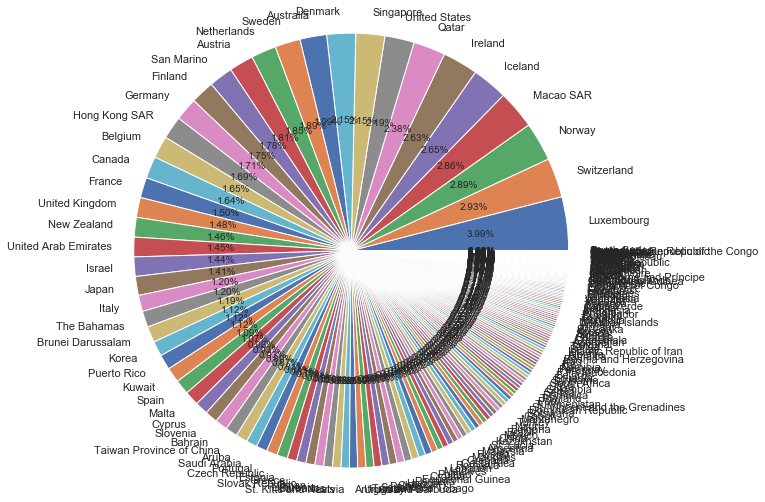

In [99]:
LBL = capita['Country']
plt.pie(capita['GDP pc'], labels = LBL, radius = 2.5, autopct = '%0.2f%%')

<BarContainer object of 192 artists>

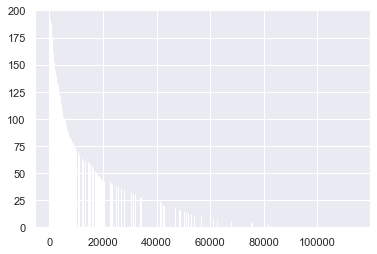

In [110]:
xpos = np.arange(len(capita))
plt.bar(capita['GDP pc'], xpos)

GDP pc      2.09
 Absolute   1.72
dtype: float64

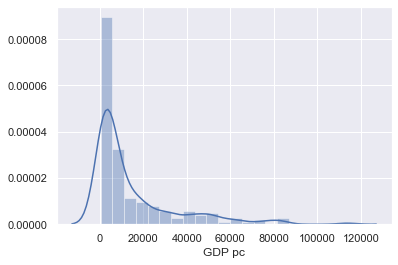

In [101]:
sns.distplot(capita['GDP pc'])
capita.skew()

In [102]:
spearmanr(capita['GDP pc'], capita[' Absolute'])

SpearmanrResult(correlation=0.8324776876542875, pvalue=1.3067772819294135e-50)

In [5]:
study = '''
Random Forest, Decision Tree, Chi Square, ANOVA, ANCOVA, Network Analysis(Degree, Betweenness, Eigenvector, Closeness, etc.) +
'''

In [6]:
study

'\nRandom Forest, Decision Tree, Chi Square, ANOVA, ANCOVA, Network Analysis(Degree, Betweenness, Eigenvector, Closeness, etc.) +\n'